<a href="https://colab.research.google.com/github/kukuakuan/DSA/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_AmazonGo_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài toán phân loại ảnh**

**Khai báo các thư viện sử dụng**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

**Kết nối với Google Drive để đọc file và lưu file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Khai báo đường dẫn thư mục chứa dữ liệu ảnh**

In [ ]:
import os
train_image_files_path = "/content/drive/My Drive/Data/Train/"
valid_image_files_path = "/content/drive/My Drive/Data/Validation/"



**Gán nhãn dữ liệu**



In [ ]:
label=['mask','no mask','mask error']

**Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  # chuẩn hóa dữ liệu ảnh về 0-1
validation_data_gen = ImageDataGenerator(rescale=1/255)

**Đọc dữ liệu train và validation**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,       # Đường dẫn tới ảnh huấn luyện                                    
    target_size=(120, 120),         # Biến đổi các ảnh huấn luyện về cùng một kích thước [120x120]      
    class_mode='categorical')     # Phân loại ảnh đa lớp (3 lớp) 

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(120, 120),               
    class_mode='categorical')


Found 251 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


**Xây dựng mô hình**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(64,(3,3), activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  

# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))

# lớp output
model.add(Dense(3, activation=tf.nn.softmax)) # 3 đầu ra 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
from tensorflow.keras.optimizers import RMSprop 
model.compile(optimizer=RMSprop(lr=0.001),  #sử dụng RMSprop 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**Huấn luyện mô hình**

In [ ]:
EPOCHS=100
history=model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=2)

Epoch 1/100
2/2 [==============================] - 33s 21s/step - loss: 24.4079 - acc: 0.3594 - val_loss: 10.1437 - val_acc: 0.3750
Epoch 2/100
2/2 [==============================] - 13s 6s/step - loss: 8.5057 - acc: 0.2542 - val_loss: 1.1000 - val_acc: 0.3750
Epoch 3/100
2/2 [==============================] - 8s 4s/step - loss: 1.1034 - acc: 0.3729 - val_loss: 1.2701 - val_acc: 0.3594
Epoch 4/100
2/2 [==============================] - 10s 5s/step - loss: 1.1090 - acc: 0.3594 - val_loss: 1.0754 - val_acc: 0.3750
Epoch 5/100
2/2 [==============================] - 5s 3s/step - loss: 0.9876 - acc: 0.6441 - val_loss: 3.9185 - val_acc: 0.3750
Epoch 6/100
2/2 [==============================] - 6s 4s/step - loss: 2.8189 - acc: 0.3281 - val_loss: 1.0756 - val_acc: 0.3594
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 1.0457 - acc: 0.4219 - val_loss: 1.0821 - val_acc: 0.3281
Epoch 8/100
2/2 [==============================] - 5s 3s/step - loss: 1.0466 - acc: 0.3438 - val_l

**Sử dụng mô hình**

Saving 244847737_966690424261965_2859537288347049780_n.jpg to 244847737_966690424261965_2859537288347049780_n.jpg
[[0. 0. 1.]]
Giá trị dự đoán:  mask error


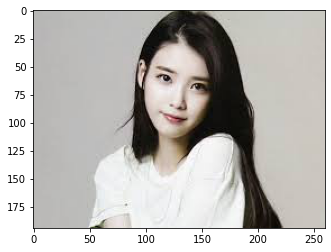

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(120,120))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=2)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])
  

## **Yêu cầu đối với Sinh viên để Nâng cao chất lượng mô hình**
1. Mở rộng dữ liệu huấn luyện và kiểm chứng về số lớp và số lượng ảnh
(ví dụ thêm lớp TrangPhuc, mỗi lớp có 100 ảnh huấn luyện, 25 ảnh kiểm chứng).

2. Thực nghiệm chuẩn hóa kích thước ảnh (ví dụ 100x100, 120x120...)

3. Bổ sung thêm một lớp mạng CNN, thay đổi số lượng và kích thước bộ lọc

4. Thay đổi tham số optimizer

5. Thay đổi giá trị số vòng lặp chạy mô hình EPOCHS

6. Xây dựng một bài toán ứng dụng về Computer Vision khác